In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import itertools
import numpy as np
import pandas as pd
import collections
import heapq
from collections import Counter
from time import time


In [2]:
raw_data_bellows = [
    (189, 216, 186),
    (171, 297, 187),
    (189, 216, 187),
    (171, 298, 188),
    (170, 300, 189),
    (189, 215, 189),
    (171, 301, 190),
    (190, 215, 190),
    (173, 298, 191),
    (190, 214, 191),
    (177, 289, 192),
    (191, 212, 192),
    (184, 264, 193),
    (192, 207, 193),
    (191, 205, 194),
    (196, 147, 195),
    (188, 103, 196),
    (202, 198, 196),
    (180, 85, 197),
    (199, 192, 197),
    (180, 78, 198),
    (199, 190, 198),
    (177, 75, 199),
    (200, 190, 199),
    (173, 79, 200),
    (199, 189, 200),
    (165, 82, 201),
    (199, 189, 201),
    (145, 95, 202),
    (79, 188, 203),
    (188, 194, 203),
    (54, 197, 204),
    (180, 190, 204),
    (45, 203, 205),
    (182, 194, 205),
    (47, 213, 206),
    (177, 191, 206),
    (50, 216, 207),
    (177, 192, 207),
    (54, 217, 208),
    (178, 193, 208),
    (59, 220, 209),
    (179, 193, 209),
    (69, 222, 210),
    (181, 193, 210),
    (87, 222, 211),
    (185, 193, 211),
    (126, 225, 212),
    (194, 200, 212),
    (173, 227, 213),
    (232, 229, 214),
    (266, 226, 215),
    (282, 227, 216),
    (289, 228, 217),
    (292, 227, 218),
    (292, 228, 219),
    (292, 229, 220),
    (292, 230, 221),
    (290, 232, 222),
    (288, 234, 223),
    (287, 235, 224),
    (284, 237, 225),
    (281, 238, 226),
    (280, 238, 227),
    (279, 239, 228),
    (278, 240, 229),
    (278, 239, 230),
    (277, 238, 231),
    (276, 237, 232),
    (274, 236, 233),
    (273, 235, 234),
    (272, 234, 235),
    (271, 234, 236),
    (269, 233, 237),
    (269, 231, 238),
    (269, 230, 239),
    (269, 230, 240),
    (268, 229, 241),
    (267, 227, 242),
    (267, 227, 243),
    (267, 227, 244),
    (267, 226, 245),
    (266, 227, 246),
    (266, 227, 247),
    (265, 227, 248),
    (265, 228, 249),
    (264, 229, 250),
    (264, 229, 251),
    (203, 187, 251),
    (265, 230, 252),
    (265, 231, 253),
    (265, 231, 254),
    (266, 232, 255),
    (265, 233, 256),
    (264, 233, 257),
    (212, 192, 257),
    (264, 233, 258),
    (211, 192, 258),
    (263, 232, 259),
    (211, 192, 259),
]
raw_data_descendo = [
    (188, 227, 1862),
    (197, 221, 1863),
    (206, 206, 1864),
    (212, 188, 1865),
    (214, 132, 1867),
    (208, 102, 1868),
    (195, 75, 1869),
    (180, 59, 1870),
    (160, 55, 1871),
    (139, 75, 1872),
    (127, 102, 1873),
    (118, 138, 1874),
    (115, 177, 1875),
    (116, 215, 1876),
    (118, 250, 1877),
    (121, 278, 1878),
    (125, 299, 1879),
    (128, 318, 1880),
    (132, 330, 1881),
    (134, 339, 1882),
    (184, 204, 1882),
    (145, 355, 1883),
    (146, 356, 1884),
    (136, 345, 1885),
    (136, 346, 1886),
    (184, 208, 1886),
    (146, 356, 1887),
    (135, 345, 1888),
    (183, 207, 1888),
    (134, 345, 1889),
    (187, 213, 1889),
    (134, 344, 1890),
    (187, 213, 1890),
    (133, 344, 1891),
    (187, 213, 1891),
    (132, 345, 1892),
    (187, 213, 1892),
    (131, 345, 1893),
    (186, 213, 1893),
    (130, 345, 1894),
    (186, 213, 1894),
    (129, 345, 1895),
    (180, 212, 1895),
    (128, 345, 1896),
    (180, 212, 1896),
    (126, 346, 1897),
    (180, 209, 1897),
    (126, 346, 1898),
    (180, 209, 1898),
    (125, 346, 1899),
    (179, 212, 1899),
    (124, 346, 1900),
    (180, 209, 1900),
    (124, 346, 1901),
    (180, 209, 1901),
    (124, 347, 1902),
    (179, 209, 1902),
    (123, 347, 1903),
    (179, 210, 1903),
    (123, 347, 1904),
    (179, 209, 1904),
    (123, 347, 1905),
    (178, 212, 1905),
    (123, 348, 1906),
    (179, 210, 1906),
    (123, 348, 1907),
    (179, 209, 1907),
    (123, 347, 1908),
    (179, 209, 1908),
    (122, 347, 1909),
    (179, 209, 1909),
    (122, 347, 1910),
    (179, 209, 1910),
    (122, 347, 1911),
    (179, 209, 1911),
    (121, 347, 1912),
    (179, 209, 1912),
    (121, 346, 1913),
    (179, 209, 1913),
    (121, 346, 1914),
    (179, 209, 1914),
    (120, 345, 1915),
    (178, 209, 1915),
    (120, 345, 1916),
    (178, 209, 1916),
    (120, 345, 1917),
    (178, 209, 1917),
    (120, 345, 1918),
    (178, 209, 1918),
    (120, 344, 1919),
    (178, 209, 1919),
    (121, 344, 1920),
    (121, 344, 1921),
    (178, 208, 1921),
    (121, 344, 1922),
    (178, 208, 1922),
    (121, 343, 1923),
    (178, 208, 1923),
    (122, 343, 1924),
    (178, 209, 1924),
]
raw_data_leviosa = [
    (126, 118, 3130),
    (125, 120, 3131),
    (124, 121, 3132),
    (123, 123, 3133),
    (122, 128, 3134),
    (124, 134, 3135),
    (128, 141, 3136),
    (137, 153, 3137),
    (142, 154, 3138),
    (147, 155, 3139),
    (153, 154, 3140),
    (159, 152, 3141),
    (169, 142, 3142),
    (175, 138, 3143),
    (182, 134, 3144),
    (189, 129, 3145),
    (194, 123, 3146),
    (198, 118, 3147),
    (202, 115, 3148),
    (205, 111, 3149),
    (207, 109, 3150),
    (208, 109, 3151),
    (209, 109, 3152),
    (211, 111, 3153),
    (213, 113, 3154),
    (214, 118, 3155),
    (216, 122, 3156),
    (218, 128, 3157),
    (218, 137, 3158),
    (218, 148, 3159),
    (218, 161, 3160),
    (217, 174, 3161),
    (215, 186, 3162),
    (215, 194, 3163),
    (214, 200, 3164),
    (214, 204, 3165),
    (213, 207, 3166),
    (212, 209, 3167),
    (211, 210, 3168),
    (211, 210, 3169),
    (211, 210, 3170),
    (211, 210, 3171),
    (211, 210, 3172),
    (211, 210, 3173),
    (211, 210, 3174),
    (211, 211, 3175),
    (212, 211, 3176),
    (212, 212, 3177),
    (212, 212, 3178),
    (212, 213, 3179),
    (212, 213, 3180),
    (212, 213, 3181),
    (213, 214, 3182),
    (213, 214, 3183),
    (213, 215, 3184),
    (214, 215, 3185),
    (214, 216, 3186),
    (214, 216, 3187),
    (214, 217, 3188),
    (214, 217, 3189),
    (215, 217, 3190),
    (215, 217, 3191),
    (215, 218, 3192),
    (215, 218, 3193),
    (215, 218, 3194),
    (215, 219, 3195),
    (215, 219, 3196),
    (215, 219, 3197),
    (215, 220, 3198),
    (215, 220, 3199),
    (215, 220, 3200),
    (216, 220, 3201),
    (216, 221, 3202),
    (217, 221, 3203),
    (217, 221, 3204),
    (217, 222, 3205),
    (217, 222, 3206),
    (217, 223, 3207),
    (218, 223, 3208),
    (218, 224, 3209),
    (218, 225, 3210),
    (218, 225, 3211),
    (218, 225, 3212),
    (219, 226, 3213),
    (219, 227, 3214),
    (219, 227, 3215),
    (219, 228, 3216),
    (219, 229, 3217),
    (219, 229, 3218),
    (219, 229, 3219),
    (219, 230, 3220),
    (219, 230, 3221),
    (220, 230, 3222),
    (220, 231, 3223),
    (220, 231, 3224),
    (220, 231, 3225),
    (220, 231, 3226),
    (220, 231, 3227),
    (220, 232, 3228),
    (220, 232, 3229),
]

raw_data_test_circle = [
    (179, 258, 169),
    (182, 254, 170),
    (186, 248, 171),
    (189, 240, 172),
    (192, 234, 173),
    (195, 229, 174),
    (198, 225, 175),
    (204, 214, 176),
    (207, 206, 177),
    (208, 199, 178),
    (190, 188, 179),
    (206, 190, 180),
    (209, 188, 181),
    (208, 184, 182),
    (336, 316, 183),
    (210, 169, 183),
    (208, 173, 184),
    (206, 170, 185),
    (205, 168, 186),
    (193, 139, 187),
    (188, 135, 188),
    (184, 130, 189),
    (179, 128, 190),
    (199, 171, 191),
    (175, 126, 191),
    (198, 171, 192),
    (170, 126, 192),
    (166, 128, 193),
    (161, 130, 194),
    (157, 132, 195),
    (152, 133, 196),
    (148, 135, 197),
    (144, 137, 198),
    (140, 140, 199),
    (137, 143, 200),
    (133, 147, 201),
    (129, 153, 202),
    (126, 158, 203),
    (123, 163, 204),
    (336, 315, 205),
    (120, 169, 205),
    (117, 176, 206),
    (114, 184, 207),
    (113, 193, 208),
    (112, 201, 209),
    (111, 210, 210),
    (112, 218, 211),
    (113, 227, 212),
    (114, 236, 213),
    (117, 245, 214),
    (119, 253, 215),
    (123, 262, 216),
    (126, 269, 217),
    (130, 274, 218),
    (134, 277, 219),
    (139, 279, 220),
    (144, 281, 221),
    (149, 283, 222),
    (155, 285, 223),
    (160, 288, 224),
    (166, 289, 225),
    (172, 290, 226),
    (179, 290, 227),
    (184, 288, 228),
    (190, 286, 229),
    (194, 281, 230),
    (197, 276, 231),
    (201, 270, 232),
    (204, 263, 233),
    (205, 256, 234),
    (205, 248, 235),
    (206, 239, 236),
    (206, 229, 237),
    (208, 212, 238),
    (209, 201, 239),
    (192, 190, 240),
    (201, 184, 241),
    (207, 175, 242),
    (207, 172, 243),
    (195, 140, 244),
    (210, 180, 245),
    (191, 132, 245),
    (204, 175, 246),
    (187, 124, 246),
    (209, 178, 247),
    (182, 117, 247),
    (202, 173, 248),
    (177, 111, 248),
    (208, 177, 249),
    (172, 106, 249),
    (207, 176, 250),
    (166, 103, 250),
    (199, 172, 251),
    (161, 99, 251),
    (205, 176, 252),
    (155, 97, 252),
    (198, 172, 253),
    (150, 97, 253),
    (201, 176, 254),
    (145, 97, 254),
]


# raw_data = raw_data_descendo
raw_data = raw_data_bellows
# raw_data = raw_data_leviosa
# raw_data = raw_data_test_circle
print(len(raw_data))


100


In [3]:
# In the Pi we get the frame already grouped like this, but my test
# data is ungrouped so just putting it back that way so I don't have
# to change what I have above
a = np.array(raw_data)
raw_data_grouped = [
    i.tolist() for i in np.split(a[:, :], np.unique(a[:, 2], return_index=True)[1][1:])
]
# raw_data_grouped.reverse()
raw_data_grouped


[[[189, 216, 186]],
 [[171, 297, 187], [189, 216, 187]],
 [[171, 298, 188]],
 [[170, 300, 189], [189, 215, 189]],
 [[171, 301, 190], [190, 215, 190]],
 [[173, 298, 191], [190, 214, 191]],
 [[177, 289, 192], [191, 212, 192]],
 [[184, 264, 193], [192, 207, 193]],
 [[191, 205, 194]],
 [[196, 147, 195]],
 [[188, 103, 196], [202, 198, 196]],
 [[180, 85, 197], [199, 192, 197]],
 [[180, 78, 198], [199, 190, 198]],
 [[177, 75, 199], [200, 190, 199]],
 [[173, 79, 200], [199, 189, 200]],
 [[165, 82, 201], [199, 189, 201]],
 [[145, 95, 202]],
 [[79, 188, 203], [188, 194, 203]],
 [[54, 197, 204], [180, 190, 204]],
 [[45, 203, 205], [182, 194, 205]],
 [[47, 213, 206], [177, 191, 206]],
 [[50, 216, 207], [177, 192, 207]],
 [[54, 217, 208], [178, 193, 208]],
 [[59, 220, 209], [179, 193, 209]],
 [[69, 222, 210], [181, 193, 210]],
 [[87, 222, 211], [185, 193, 211]],
 [[126, 225, 212], [194, 200, 212]],
 [[173, 227, 213]],
 [[232, 229, 214]],
 [[266, 226, 215]],
 [[282, 227, 216]],
 [[289, 228, 217]],
 

In [4]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Point({self.x},{self.y})"

for_cpp = []
for frame in raw_data_grouped:
    fixed_frame = tuple([Point(p[0], p[1]) for p in frame])
    for_cpp.append(set(fixed_frame))
print(for_cpp)

[{Point(189,216)}, {Point(189,216), Point(171,297)}, {Point(171,298)}, {Point(189,215), Point(170,300)}, {Point(171,301), Point(190,215)}, {Point(173,298), Point(190,214)}, {Point(191,212), Point(177,289)}, {Point(184,264), Point(192,207)}, {Point(191,205)}, {Point(196,147)}, {Point(188,103), Point(202,198)}, {Point(180,85), Point(199,192)}, {Point(199,190), Point(180,78)}, {Point(177,75), Point(200,190)}, {Point(199,189), Point(173,79)}, {Point(165,82), Point(199,189)}, {Point(145,95)}, {Point(79,188), Point(188,194)}, {Point(180,190), Point(54,197)}, {Point(182,194), Point(45,203)}, {Point(177,191), Point(47,213)}, {Point(50,216), Point(177,192)}, {Point(54,217), Point(178,193)}, {Point(179,193), Point(59,220)}, {Point(69,222), Point(181,193)}, {Point(185,193), Point(87,222)}, {Point(126,225), Point(194,200)}, {Point(173,227)}, {Point(232,229)}, {Point(266,226)}, {Point(282,227)}, {Point(289,228)}, {Point(292,227)}, {Point(292,228)}, {Point(292,229)}, {Point(292,230)}, {Point(290,232

In [5]:
def displacement(v0, v1):
    angle = np.arctan2(np.linalg.det([v0, v1]), np.dot(v0, v1))
    disp = 180 - np.abs(np.degrees(angle))
    return disp

loser_bin = collections.Counter()
loser_timestamps = {}
loser_bin_evictions_counter = 0
loser_bin_stats_counter = 0

In [6]:
min_frame = raw_data_grouped[0][0][2]
filtered_frames = []
frame_q = collections.deque(maxlen=5)
bin_size = 20
x = []
y = []

start = time()

def append_frame(f):
    if len(filtered_frames) > 0 and filtered_frames[-1][0] == f[0]:
        return
    filtered_frames.append(f)

for frame in raw_data_grouped:
    formatted_frame = [
        [(pt[0], pt[1]), pt[2] - min_frame] for pt in frame
    ]
    frame_q.append(formatted_frame)
    if len(frame_q) < 3:
        # Don't do anything until we have enough points to vote
        continue

    def is_loser(pt):
        ret = (int(pt[0][0] / bin_size), int(pt[0][1] / bin_size)) in loser_bin
        if ret:
            global loser_bin_evictions_counter
            loser_bin_evictions_counter += 1
        return ret

    def add_loser(pt):
        loser_bin[(int(pt[0][0] / bin_size), int(pt[0][1] / bin_size))] += 1
        loser_timestamps[(int(pt[0][0] / bin_size), int(pt[0][1] / bin_size))] = time()

    def trim_losers():
        to_remove = []
        for loser, timestamp in loser_timestamps.items():
            if (time() - timestamp) > 30:
                to_remove.append(loser)
        for winner in to_remove:
            del loser_bin[winner]
            del loser_timestamps[winner]

    if len(frame_q[0]) == 1:
        # If the frame we are processing only has one hit
        # pass it through assuming it's the wand
        # There is safely only one point here so we can just index it
        # directly
        if not is_loser(frame_q[0][0]):
            append_frame(frame_q[0][0])
        continue

    # Choose the point that results in the lowest angular displacement
    # from the previous point
    # Right now we can't tolerate starting with a frame that has multiple
    # blob hits.  Skip until we get something that is not ambiguous.
    if len(filtered_frames) == 0 and len(frame_q[0]) > 1:
        # print("Ambiguous start frame")
        if not is_loser(frame_q[0][0]):
            append_frame(frame_q[0][0])
        continue

    # The grid is made up the of the array indices for each frame so we can
    # easily locate the points in the queue that we need later on.
    # This will always reference filtered_framts[-1] as the previous frame
    # to create the first angle...
    grid = [
        x
        for x in itertools.product(
            [i for i in range(len(frame_q[0])) if not is_loser(frame_q[0][i])],
            [i for i in range(len(frame_q[1])) if not is_loser(frame_q[1][i])],
            [i for i in range(len(frame_q[2])) if not is_loser(frame_q[2][i])],
        )
    ]
    min_grid_idx = None
    min_value = None
    ref_frame = filtered_frames[-1]
    debug_out = []
    for grid_idx, candidate in enumerate(grid):
        all_disp = []
        for i in range(len(candidate) - 1):
            if i == 0:
                v1 = np.array(ref_frame[0]) - np.array(frame_q[i][candidate[i]][0])  # type: ignore
            else:
                v1 = np.array(frame_q[i - 1][candidate[i - 1]][0]) - np.array(frame_q[i][candidate[i]][0])  # type: ignore
            v0 = np.array(frame_q[i + 1][candidate[i + 1]][0]) - np.array(frame_q[i][candidate[i]][0])  # type: ignore
            this_disp = displacement(v0, v1) * np.linalg.norm(v1)
            all_disp.append(this_disp)

        total_disp = sum(all_disp)
        debug_out.append(f"{[ref_frame[0]] + [frame_q[i][candidate[i]][0] for i in range(len(candidate))]} = {total_disp}")
        if not min_value or total_disp < min_value:
            min_value = total_disp
            min_grid_idx = grid_idx

    if min_grid_idx is not None:
        new_point = frame_q[0][grid[min_grid_idx][0]]
        for idx, pt in enumerate(frame_q[0]):
            if idx != grid[min_grid_idx][0]:
                add_loser(pt)
        append_frame(new_point)

global loser_bin_stats_counter
loser_bin_stats_counter += 1
if (loser_bin_stats_counter % 30) == 0:
    print(f"loser bin: {loser_bin_evictions_counter}")
trim_losers()
print(f"{time()-start}")



for frame in filtered_frames:
    x.append(frame[0][0])
    y.append(frame[0][1])
vectors = pd.DataFrame(
    {
        "x": x,
        "y": y,
    }
)
vectors


0.004893779754638672


,x,y
0,189,216
1,171,297
2,171,298
3,170,300
4,171,301
...,...,...
56,265,228
57,264,229
58,265,230
59,265,231


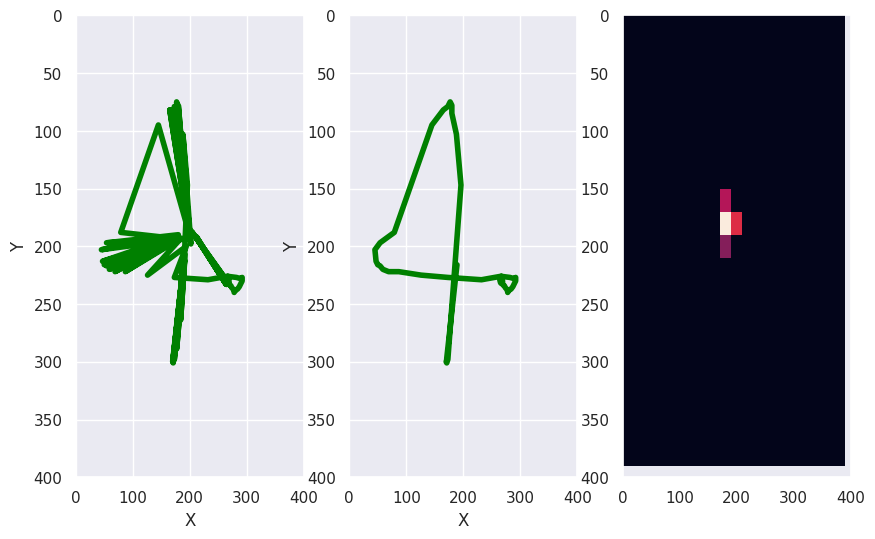

In [11]:
# %matplotlib widget
sns.set(style="darkgrid")

fig = plt.figure(figsize=(10, 6), dpi=100)
ax_fixed = fig.add_subplot(131)
ax_orig = fig.add_subplot(132)
ax_hist = fig.add_subplot(133)

ax_orig.set_xlabel("X")
ax_orig.set_ylabel("Y")
ax_orig.set(ylim=(0, 400), xlim=(0, 400))
ax_orig.invert_yaxis()
ax_orig.plot(vectors.x, vectors.y, color="green", marker="", linewidth=4)

ax_fixed.set_xlabel("X")
ax_fixed.set_ylabel("Y")
ax_fixed.set(ylim=(0, 400), xlim=(0, 400))
ax_fixed.invert_yaxis()
ax_fixed.plot(
    [pt[0] for frame in raw_data_grouped for pt in frame],
    [pt[1] for frame in raw_data_grouped for pt in frame],
    color="green",
    marker="",
    linewidth=4,
)

bin_map = np.zeros((20,20))
for frame in [(p[0], p[1], v) for p, v in loser_bin.items()]:
    if frame[2] < 255:
        intensity = frame[2]
    else:
        intensity = 255
    bin_map[frame[0]][frame[1]] = intensity
X, Y = np.meshgrid([i for i in range(0, 400, 20)], [i for i in range(0, 400, 20)])
ax_hist.set(ylim=(0, 400), xlim=(0, 400))
ax_hist.pcolormesh(X, Y, bin_map)
ax_hist.invert_yaxis()


# Old unused code past this opint

In [8]:
# quant = 1
# arr = np.array(flat_data)
# split_arr = np.squeeze(np.hsplit(arr, 3))
# # raw_df = pd.DataFrame({'x': split_arr[0], 'y': split_arr[1], 'value': split_arr[2]})
# raw_df = pd.DataFrame({'x': split_arr[0], 'y': split_arr[1]})
# raw_df.x = raw_df.x.apply(lambda x: x//quant)
# raw_df.y = raw_df.y.apply(lambda x: x//quant)
# raw_df


In [9]:
# counts = raw_df.value_counts().reset_index()
# counts.rename({0: 'count'}, axis=1, inplace=True)
# # filt_counts = counts[(counts['value'] < 150) & (counts['count'] < 2)]
# filt_counts = counts[(counts['count'] < 2)]
# # filt_counts = counts
# # ax = sn.scatterplot(filt_counts, x='x', y='y', size='count', hue='value')
# ax = sn.scatterplot(filt_counts, x='x', y='y', hue='count')
# ax.set(ylim=(0,400//quant), xlim=(0,400//quant))
# ax.invert_yaxis()
